In [13]:
from pathlib import Path
import pandas as pd
data = pd.read_pickle('../data/QM_137k_training.pkl')
display(data)
display(data.shape)

,smiles,hirshfeld_charges,hirshfeld_fukui_elec,hirshfeld_fukui_neu,NMR_SC,bond_length_matrix,bond_index_matrix,CDD
0,CNC(=S)N/N=C/c1c(O)ccc2ccccc12,"[-0.026644, -0.075508, 0.096217, -0.287798, -0...","[0.010333000000000002, 0.015418000000000001, 0...","[0.011959000000000001, 0.021591000000000006, 0...","[162.548, 162.8281, 20.2593, 458.2904, 90.8408...","[[0.0, 1.4372890960937539, 2.4525543850909814,...","[[0.0, 0.9595, 0.0158, 0.0162, 0.0103, 0.0008,...","[-0.07558000000000001, -0.18802500000000003, 0..."
2,O=C(NCCn1cccc1)c1cccc2ccccc12,"[-0.292411, 0.170263, -0.085754, 0.002736, 0.0...","[0.04781000000000002, 0.029278, 0.020640000000...","[0.026717999999999964, 0.0040060000000000096, ...","[-53.9279, 29.039, 147.0512, 147.8371, 143.147...","[[0.0, 1.2158509801073485, 2.2520730233154076,...","[[0.0, 1.6334, 0.1799, 0.0086, 0.0068, 0.0002,...","[-0.6593499999999999, 0.30724199999999996, -0...."
3,C=C(C)[C@H]1C[C@@H]2OO[C@H]1C=C2C,"[-0.101749, 0.012339, -0.07947, -0.020027, -0....","[0.08232399999999998, 0.057510000000000006, 0....","[0.06578600000000001, 0.029895, 0.018721, 0.02...","[87.1119, 44.2014, 168.257, 147.3801, 158.9518...","[[0.0, 1.3223632546838255, 2.468055985361353, ...","[[0.0, 1.9083, 0.0179, 0.016, 0.0236, 0.001, 0...","[-0.35160800000000003, -0.062727, -0.198206999..."
4,OCCCc1cc[nH]n1,"[-0.268379, 0.027614, -0.050745, -0.045047, 0....","[0.025129000000000012, 0.01567, 0.021808000000...","[0.21068599999999998, 0.04455100000000001, 0.0...","[296.7167, 124.9048, 157.6305, 159.8255, 39.44...","[[0.0, 1.4018301850170725, 2.4667588956616737,...","[[0.0, 0.9446, 0.0311, 0.002, 0.005, 0.0007, 0...","[-0.772573, -0.004993000000000011, -0.16537000..."
5,CC(=N)NCc1cccc(CNCc2ccncc2)c1,"[-0.083162, 0.114954, -0.274544, -0.100369, 0....","[0.005584000000000006, 0.007569000000000006, 0...","[0.011283000000000001, 0.029042000000000012, 0...","[167.8424, 40.9974, 45.9095, 153.286, 147.3216...","[[0.0, 1.5137126697008916, 2.4882198180715465,...","[[0.0, 1.0036, 0.0437, 0.0108, 0.0134, 0.0004,...","[-0.183191, 0.193297, -0.650776, -0.294033, -0..."
...,...,...,...,...,...,...,...,...
137447,CC(C)(O)C#Cc1ccc(B(O)O)c([C@H](Cc2cc(F)cc(F)c2...,"[-0.085936, 0.106032, -0.079299, -0.227724, -0...","[0.012857000000000007, 0.009235000000000007, 0...","[0.014045000000000002, 0.007316000000000003, 0...","[157.682, 128.1586, 161.8916, 256.7353, 96.401...","[[0.0, 1.5380460842295982, 2.528221771018714, ...","[[0.0, 0.9775000214576721, 0.01229999959468841...","[-0.198774, 0.195513, -0.17846499999999998, -0..."
137448,CC(C)(C)OC(=O)N1CC(CC#N)(n2cc(B3OC(C)(C)C(C)(C...,"[-0.092575, 0.108615, -0.092711, -0.08598, -0....","[0.0028649999999999926, 0.0005170000000000036,...","[0.0078109999999999985, 0.0022849999999999954,...","[166.2628, 114.2758, 165.818, 160.04, 162.1335...","[[0.0, 1.52778167400483, 2.522062082240245, 2....","[[0.0, 1.0022000074386597, 0.01119999960064888...","[-0.195826, 0.214428, -0.194554, -0.1814390000..."
137449,CC1(C)OB(C2=CCNCC2)OC1(C)C,"[-0.085222, 0.09662, -0.0883, -0.199958, 0.205...","[0.008819999999999995, 0.005026000000000003, 0...","[0.008056000000000008, 0.007975999999999997, 0...","[165.9765, 109.9053, 162.5031, 185.5177, 81.91...","[[0.0, 1.5268658210546857, 2.493084479493224, ...","[[0.0, 1.0025999546051025, 0.01070000045001506...","[-0.18732000000000001, 0.180238, -0.1981, -0.4..."
137450,CC(C)(C)OC(=O)Nc1cc(B2OC(C)(C)C(C)(C)O2)ccn1,"[-0.085576, 0.108086, -0.092508, -0.092366, -0...","[0.004338999999999996, 0.001590000000000008, 0...","[0.005990999999999996, 0.003474999999999992, 0...","[159.846, 114.5882, 166.2116, 166.05, 154.0396...","[[0.0, 1.5291605773328716, 2.5123012076687776,...","[[0.0, 1.003000020980835, 0.011500000022351742...","[-0.181482, 0.211107, -0.19520400000000002, -0..."


(136219, 8)

### Preliminar

### Считаем CDD

In [2]:
import pandas as pd

#data = pd.read_pickle('QM_137k_training.pkl')

def calculate_cdd(row):
    return [2 * hc - hfe - hfn for hc, hfe, hfn in zip(row['hirshfeld_charges'], row['hirshfeld_fukui_elec'], row['hirshfeld_fukui_neu'])]

data['CDD'] = data.apply(calculate_cdd, axis=1)

data.to_pickle('../data/QM_137k_training.pkl')
data.head(0)

,smiles,hirshfeld_charges,hirshfeld_fukui_elec,hirshfeld_fukui_neu,NMR_SC,bond_length_matrix,bond_index_matrix,CDD
0,CNC(=S)N/N=C/c1c(O)ccc2ccccc12,"[-0.026644, -0.075508, 0.096217, -0.287798, -0...","[0.010333000000000002, 0.015418000000000001, 0...","[0.011959000000000001, 0.021591000000000006, 0...","[162.548, 162.8281, 20.2593, 458.2904, 90.8408...","[[0.0, 1.4372890960937539, 2.4525543850909814,...","[[0.0, 0.9595, 0.0158, 0.0162, 0.0103, 0.0008,...","[-0.07558000000000001, -0.18802500000000003, 0..."
2,O=C(NCCn1cccc1)c1cccc2ccccc12,"[-0.292411, 0.170263, -0.085754, 0.002736, 0.0...","[0.04781000000000002, 0.029278, 0.020640000000...","[0.026717999999999964, 0.0040060000000000096, ...","[-53.9279, 29.039, 147.0512, 147.8371, 143.147...","[[0.0, 1.2158509801073485, 2.2520730233154076,...","[[0.0, 1.6334, 0.1799, 0.0086, 0.0068, 0.0002,...","[-0.6593499999999999, 0.30724199999999996, -0...."
3,C=C(C)[C@H]1C[C@@H]2OO[C@H]1C=C2C,"[-0.101749, 0.012339, -0.07947, -0.020027, -0....","[0.08232399999999998, 0.057510000000000006, 0....","[0.06578600000000001, 0.029895, 0.018721, 0.02...","[87.1119, 44.2014, 168.257, 147.3801, 158.9518...","[[0.0, 1.3223632546838255, 2.468055985361353, ...","[[0.0, 1.9083, 0.0179, 0.016, 0.0236, 0.001, 0...","[-0.35160800000000003, -0.062727, -0.198206999..."
4,OCCCc1cc[nH]n1,"[-0.268379, 0.027614, -0.050745, -0.045047, 0....","[0.025129000000000012, 0.01567, 0.021808000000...","[0.21068599999999998, 0.04455100000000001, 0.0...","[296.7167, 124.9048, 157.6305, 159.8255, 39.44...","[[0.0, 1.4018301850170725, 2.4667588956616737,...","[[0.0, 0.9446, 0.0311, 0.002, 0.005, 0.0007, 0...","[-0.772573, -0.004993000000000011, -0.16537000..."
5,CC(=N)NCc1cccc(CNCc2ccncc2)c1,"[-0.083162, 0.114954, -0.274544, -0.100369, 0....","[0.005584000000000006, 0.007569000000000006, 0...","[0.011283000000000001, 0.029042000000000012, 0...","[167.8424, 40.9974, 45.9095, 153.286, 147.3216...","[[0.0, 1.5137126697008916, 2.4882198180715465,...","[[0.0, 1.0036, 0.0437, 0.0108, 0.0134, 0.0004,...","[-0.183191, 0.193297, -0.650776, -0.294033, -0..."
...,...,...,...,...,...,...,...,...
137447,CC(C)(O)C#Cc1ccc(B(O)O)c([C@H](Cc2cc(F)cc(F)c2...,"[-0.085936, 0.106032, -0.079299, -0.227724, -0...","[0.012857000000000007, 0.009235000000000007, 0...","[0.014045000000000002, 0.007316000000000003, 0...","[157.682, 128.1586, 161.8916, 256.7353, 96.401...","[[0.0, 1.5380460842295982, 2.528221771018714, ...","[[0.0, 0.9775000214576721, 0.01229999959468841...","[-0.198774, 0.195513, -0.17846499999999998, -0..."
137448,CC(C)(C)OC(=O)N1CC(CC#N)(n2cc(B3OC(C)(C)C(C)(C...,"[-0.092575, 0.108615, -0.092711, -0.08598, -0....","[0.0028649999999999926, 0.0005170000000000036,...","[0.0078109999999999985, 0.0022849999999999954,...","[166.2628, 114.2758, 165.818, 160.04, 162.1335...","[[0.0, 1.52778167400483, 2.522062082240245, 2....","[[0.0, 1.0022000074386597, 0.01119999960064888...","[-0.195826, 0.214428, -0.194554, -0.1814390000..."
137449,CC1(C)OB(C2=CCNCC2)OC1(C)C,"[-0.085222, 0.09662, -0.0883, -0.199958, 0.205...","[0.008819999999999995, 0.005026000000000003, 0...","[0.008056000000000008, 0.007975999999999997, 0...","[165.9765, 109.9053, 162.5031, 185.5177, 81.91...","[[0.0, 1.5268658210546857, 2.493084479493224, ...","[[0.0, 1.0025999546051025, 0.01070000045001506...","[-0.18732000000000001, 0.180238, -0.1981, -0.4..."
137450,CC(C)(C)OC(=O)Nc1cc(B2OC(C)(C)C(C)(C)O2)ccn1,"[-0.085576, 0.108086, -0.092508, -0.092366, -0...","[0.004338999999999996, 0.001590000000000008, 0...","[0.005990999999999996, 0.003474999999999992, 0...","[159.846, 114.5882, 166.2116, 166.05, 154.0396...","[[0.0, 1.5291605773328716, 2.5123012076687776,...","[[0.0, 1.003000020980835, 0.011500000022351742...","[-0.181482, 0.211107, -0.19520400000000002, -0..."


## Считаем Модель

In [5]:
from subprocess import run
result = run('sbatch -n 10 --gres=shard:3 ./train_model.sh', check=True, shell=True)
#result = run('sbatch -n 10 ./train_model.sh', check=True, shell=True)
!squeue

Submitted batch job 8173
             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
              8173    LocalQ train_mo nikolenk PD       0:00      1 (None)


## Предсказание

In [3]:
import pandas as pd
from pathlib import Path
import subprocess
import re

# Функция для создания модифицированных файлов .csv
def create_modified_datasets(directory_path):
    print(f"Creating modified datasets in {directory_path}")
    for file_path in directory_path.glob('modified_*.csv'):
        print(f"Removing existing file: {file_path}")
        file_path.unlink()

    for file_path in directory_path.glob('*.csv'):
        df = pd.read_csv(file_path)
        df.rename(columns={'id': 'compounds_ID'}, inplace=True)
        df.reset_index(inplace=True)
        df.rename(columns={'index': ''}, inplace=True)
        new_file_path = directory_path / f'modified_{file_path.name}'
        df.to_csv(new_file_path, index=False)
        print(f"Created file: {new_file_path}")

def remove_existing_results(directory_path):
    print(f"Removing existing result files in {directory_path}")
    for file_path in directory_path.glob('result_*.pkl'):
        print(f"Removing file: {file_path}")
        file_path.unlink()


# Функция для извлечения и модификации target_vars из файла verbose.log
def extract_target_vars(log_file_path):
    with open(log_file_path, 'r') as file:
        log_content = file.read()
        match = re.search(r"'atom_targets': \[([^\]]+)", log_content)
        if match:
            targets_str = match.group(1)
            targets = ['pred_' + target.strip().strip("'") for target in targets_str.split(',')]
            targets.extend(['bond_index', 'bond_length'])
            return targets
        else:
            raise ValueError("Target variables not found in log file.")

# Основной код
folders = ['QM_137k_fukui']
datasets = ['val', 'train', 'test']

for folder in folders:
    directory_path = Path(folder)
    create_modified_datasets(directory_path)
    remove_existing_results(directory_path)

    log_file_path = directory_path / 'verbose.log'
    target_vars = extract_target_vars(log_file_path)
    target_vars_str = ' '.join(target_vars)

    for dataset in datasets:
        pkl_file = f"{folder}/result_{dataset}.pkl"
        csv_file = f"{folder}/modified_{dataset}_smiles.csv"
        
        python_cmd = f"python predict.py --test_path {csv_file} " \
                     f"--checkpoint_path {folder}/model_0/model.pt " \
                     f"--preds_path {pkl_file} " \
                     f"--target_vars {target_vars_str}"

        bash_script_path = directory_path / f'predict_model_{dataset}.sh'
        with open(bash_script_path, 'w') as file:
            file.write(f"#!/bin/bash\nexport CUDA_VISIBLE_DEVICES=0\n{python_cmd}\n")

        subprocess.run(['chmod', '+x', bash_script_path])
        subprocess.run(f"sbatch -n 8 --gres=shard:1 {bash_script_path}", shell=True, check=True, capture_output=True)
        subprocess.run(['rm', bash_script_path], capture_output=True)

!squeue

Creating modified datasets in QM_137k_fukui_logCDD_x4
Created file: QM_137k_fukui_logCDD_x4/modified_train_smiles.csv
Created file: QM_137k_fukui_logCDD_x4/modified_val_smiles.csv
Created file: QM_137k_fukui_logCDD_x4/modified_test_smiles.csv
Removing existing result files in QM_137k_fukui_logCDD_x4
             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
               526    LocalQ predict_ nikolenk PD       0:00      1 (None)
               527    LocalQ predict_ nikolenk PD       0:00      1 (Priority)
               528    LocalQ predict_ nikolenk PD       0:00      1 (Priority)
               321    LocalQ gen_grap potashni  R 5-21:17:04      1 localhost
               522    LocalQ run_hype potashni  R    1:41:30      1 localhost
               524    LocalQ predict_ nikolenk  R       1:43      1 localhost


## Создаем лог10

In [4]:
import pandas as pd
import numpy as np

data = pd.read_pickle('../data/QM_137k_training.pkl')

for column in ['hirshfeld_fukui_elec', 'hirshfeld_fukui_neu', 'CDD']:
    data[column] = data[column].apply(lambda x: [np.log10(np.abs(val)) if val != 0 else 0 for val in x])

data.to_pickle('../data/QM_137k_training_log10.pkl')

## Подготовка данных 

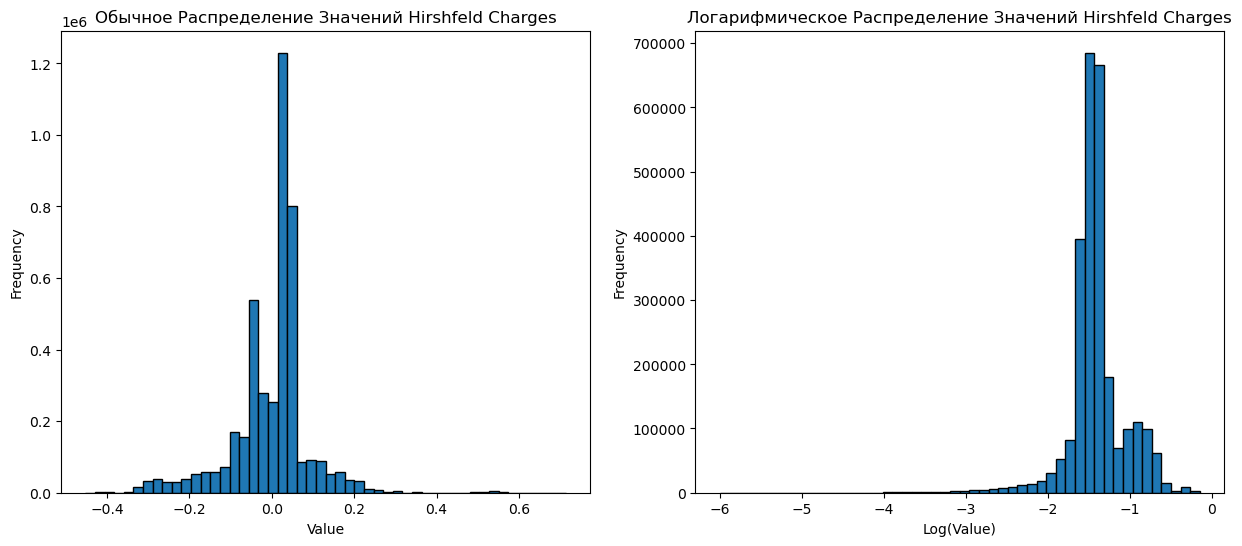

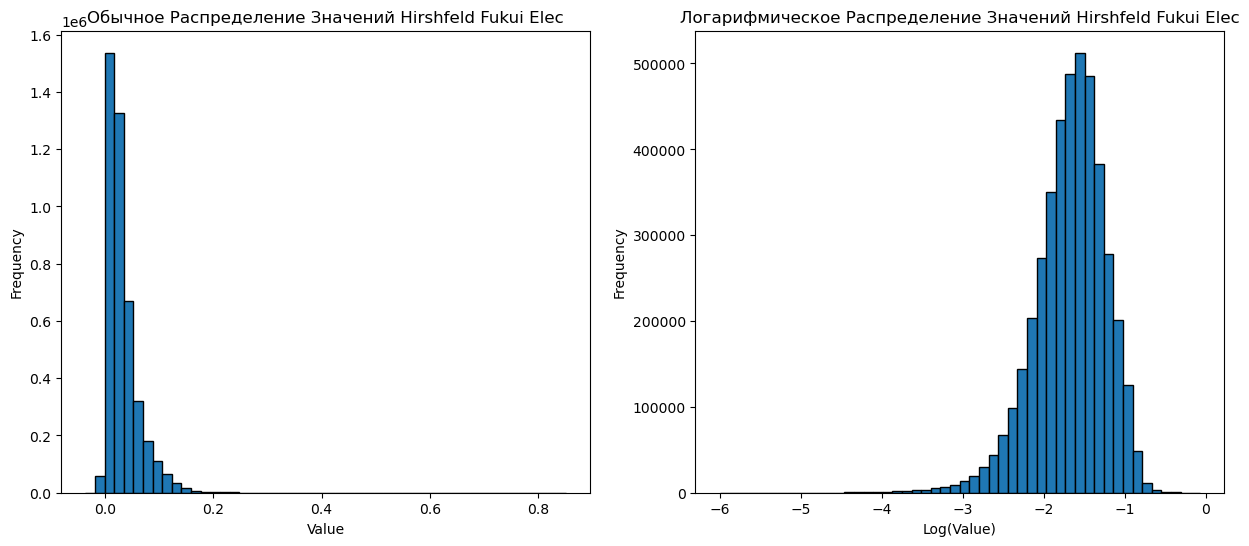

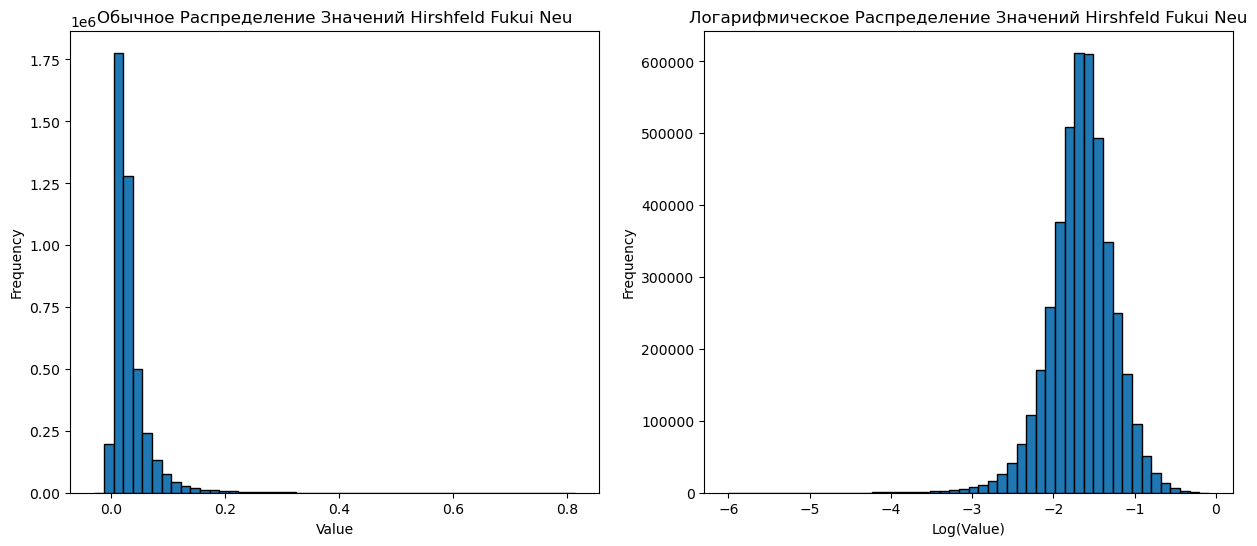

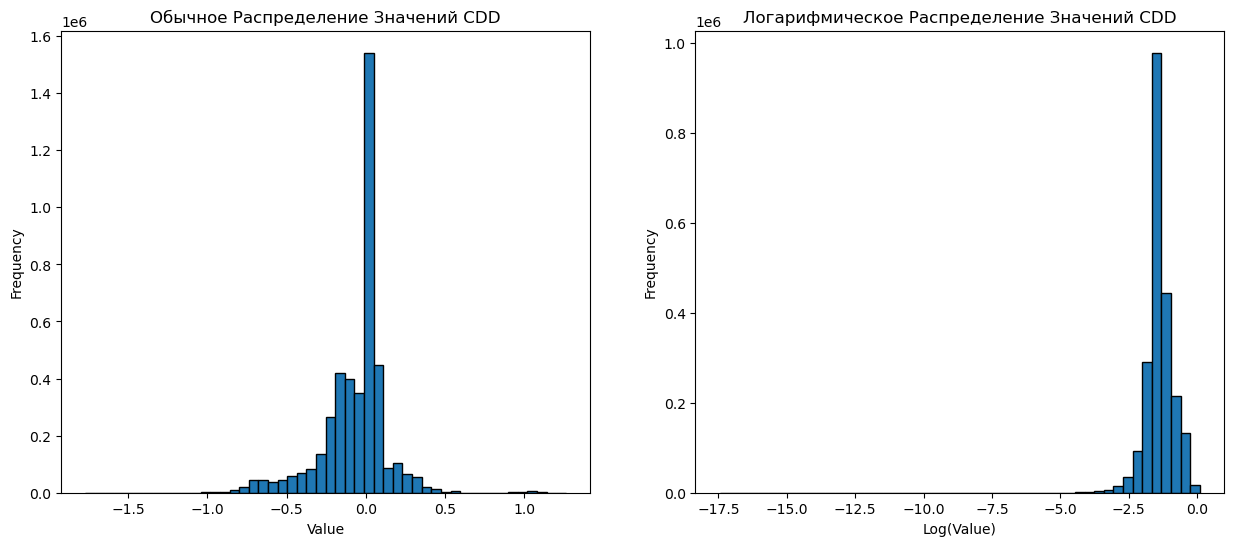

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_pickle('../data/QM_137k_training.pkl')

hirshfeld_charges = data['hirshfeld_charges'].explode().astype(float)
hirshfeld_fukui_elec = data['hirshfeld_fukui_elec'].explode().astype(float)
hirshfeld_fukui_neu = data['hirshfeld_fukui_neu'].explode().astype(float)
CDD = data['CDD'].explode().astype(float)

def plot_subgraphs(values, title, bins=50):
    values = pd.Series(values).dropna() 
    values_log = values[values > 0].apply(np.log10) 

    fig, axs = plt.subplots(1, 2, figsize=(15, 6))

    axs[0].hist(values, bins=bins, edgecolor='black')
    axs[0].set_title('Обычное ' + title)
    axs[0].set_xlabel('Value')
    axs[0].set_ylabel('Frequency')

    axs[1].hist(values_log, bins=bins, edgecolor='black')
    axs[1].set_title('Логарифмическое ' + title)
    axs[1].set_xlabel('Log(Value)')
    axs[1].set_ylabel('Frequency')

    plt.show()

plot_subgraphs(hirshfeld_charges, 'Распределение Значений Hirshfeld Charges')
plot_subgraphs(hirshfeld_fukui_elec, 'Распределение Значений Hirshfeld Fukui Elec')
plot_subgraphs(hirshfeld_fukui_neu, 'Распределение Значений Hirshfeld Fukui Neu')
plot_subgraphs(CDD, 'Распределение Значений CDD')

### RMSE табличка

In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from pathlib import Path
from IPython.display import display

def flatten(list_of_lists):
    return [item for sublist in list_of_lists for item in sublist]

def calculate_metrics(predicted, actual):
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    r2 = r2_score(actual, predicted)
    return rmse, r2

def analyze_folder(folder_path, actual_data_file):
    file_paths = [
        (folder_path / 'result_train.pkl', actual_data_file),
        (folder_path / 'result_test.pkl', actual_data_file),
        (folder_path / 'result_val.pkl', actual_data_file)
    ]

    all_results = []
    for prediction_path, actual_path in file_paths:
        try:
            
            predictions = pd.read_pickle(prediction_path)
            actual_data = pd.read_pickle(actual_path)

            merged_data = predictions.merge(actual_data, on='smiles')

            prediction_columns = [col for col in predictions.columns if col.startswith('pred_')]

            for pred_column in prediction_columns:
                actual_column = pred_column[5:]
                if actual_column in actual_data.columns:
                    predicted_values = merged_data[pred_column].tolist()
                    predicted_values_flat = flatten([array.tolist() for array in predicted_values])

                    actual_values = merged_data[actual_column].tolist()
                    actual_values_flat = flatten(actual_values)

                    rmse, r2 = calculate_metrics(predicted_values_flat, actual_values_flat)
                    all_results.append((prediction_path.name, actual_path.name, pred_column, actual_column, rmse, r2))

        except Exception as e:
            print(f"Error processing {prediction_path.name} or {actual_path.name}: {e}")

    if all_results:
        result_df = pd.DataFrame(all_results, columns=['Prediction File', 'Actual File', 'Predicted Column', 'Actual Column', 'RMSE', 'R^2'])
        result_df = result_df.sort_values(by=['Predicted Column', 'Actual Column'])
        display(result_df)
        
        result_csv_path = folder_path / 'analysis_results.csv'
        result_df.to_csv(result_csv_path, index=False)
        print(f"Results saved to {result_csv_path}")
    else:
        print(f"No valid results for folder {folder_path}")





In [6]:
base_path = Path('.')
folder_paths = base_path.glob('QM_137k_fukui*/')

actual_data_file = Path('./QM_137k_training.pkl')

for folder_path in folder_paths:
    if folder_path.is_dir():
        print(f"Analyzing folder: {folder_path}")
        analyze_folder(folder_path, actual_data_file)

Analyzing folder: QM_137k_fukui_out_full


,Prediction File,Actual File,Predicted Column,Actual Column,RMSE,R^2
4,result_train.pkl,QM_137k_training.pkl,pred_CDD,CDD,0.024916,0.985738
9,result_test.pkl,QM_137k_training.pkl,pred_CDD,CDD,0.025768,0.984878
14,result_val.pkl,QM_137k_training.pkl,pred_CDD,CDD,0.025733,0.984760
3,result_train.pkl,QM_137k_training.pkl,pred_NMR_SC,NMR_SC,3.782979,0.999378
8,result_test.pkl,QM_137k_training.pkl,pred_NMR_SC,NMR_SC,4.362497,0.999187
13,result_val.pkl,QM_137k_training.pkl,pred_NMR_SC,NMR_SC,4.617451,0.999029
0,result_train.pkl,QM_137k_training.pkl,pred_hirshfeld_charges,hirshfeld_charges,0.008133,0.992391
5,result_test.pkl,QM_137k_training.pkl,pred_hirshfeld_charges,hirshfeld_charges,0.008283,0.992190
10,result_val.pkl,QM_137k_training.pkl,pred_hirshfeld_charges,hirshfeld_charges,0.008233,0.992183
2,result_train.pkl,QM_137k_training.pkl,pred_hirshfeld_fukui_elec,hirshfeld_fukui_elec,0.008536,0.920443


Results saved to QM_137k_fukui_out_full/analysis_results.csv
Analyzing folder: QM_137k_fukui_hirshfeld_fukui_neu_x4


,Prediction File,Actual File,Predicted Column,Actual Column,RMSE,R^2
0,result_train.pkl,QM_137k_training.pkl,pred_hirshfeld_fukui_neu,hirshfeld_fukui_neu,0.014741,0.804275
1,result_test.pkl,QM_137k_training.pkl,pred_hirshfeld_fukui_neu,hirshfeld_fukui_neu,0.015063,0.795549
2,result_val.pkl,QM_137k_training.pkl,pred_hirshfeld_fukui_neu,hirshfeld_fukui_neu,0.015149,0.795616


Results saved to QM_137k_fukui_hirshfeld_fukui_neu_x4/analysis_results.csv
Analyzing folder: QM_137k_fukui_CDD


,Prediction File,Actual File,Predicted Column,Actual Column,RMSE,R^2
0,result_train.pkl,QM_137k_training.pkl,pred_CDD,CDD,0.075948,0.867491
1,result_test.pkl,QM_137k_training.pkl,pred_CDD,CDD,0.076463,0.866848
2,result_val.pkl,QM_137k_training.pkl,pred_CDD,CDD,0.076267,0.866132


Results saved to QM_137k_fukui_CDD/analysis_results.csv
Analyzing folder: QM_137k_fukui_CDDx4


,Prediction File,Actual File,Predicted Column,Actual Column,RMSE,R^2
0,result_train.pkl,QM_137k_training.pkl,pred_CDD,CDD,0.032873,0.975175
1,result_test.pkl,QM_137k_training.pkl,pred_CDD,CDD,0.033574,0.974329
2,result_val.pkl,QM_137k_training.pkl,pred_CDD,CDD,0.033507,0.974161


Results saved to QM_137k_fukui_CDDx4/analysis_results.csv
Analyzing folder: QM_137k_fukui_CDD_logCDD


,Prediction File,Actual File,Predicted Column,Actual Column,RMSE,R^2
0,result_train.pkl,QM_137k_training.pkl,pred_CDD,CDD,0.072342,0.879776
2,result_test.pkl,QM_137k_training.pkl,pred_CDD,CDD,0.072812,0.879261
4,result_val.pkl,QM_137k_training.pkl,pred_CDD,CDD,0.072658,0.878500
1,result_train.pkl,QM_137k_training.pkl,pred_log_CDD,log_CDD,1.207531,-3.525733
3,result_test.pkl,QM_137k_training.pkl,pred_log_CDD,log_CDD,1.208069,-3.545109
5,result_val.pkl,QM_137k_training.pkl,pred_log_CDD,log_CDD,1.210065,-3.565142


Results saved to QM_137k_fukui_CDD_logCDD/analysis_results.csv
Analyzing folder: QM_137k_fukui_hirshfeld_charges_x4


,Prediction File,Actual File,Predicted Column,Actual Column,RMSE,R^2
0,result_train.pkl,QM_137k_training.pkl,pred_hirshfeld_charges,hirshfeld_charges,0.015311,0.973032
1,result_test.pkl,QM_137k_training.pkl,pred_hirshfeld_charges,hirshfeld_charges,0.015439,0.972863
2,result_val.pkl,QM_137k_training.pkl,pred_hirshfeld_charges,hirshfeld_charges,0.015338,0.972868


Results saved to QM_137k_fukui_hirshfeld_charges_x4/analysis_results.csv
Analyzing folder: QM_137k_fukui_hirshfeld_charges


,Prediction File,Actual File,Predicted Column,Actual Column,RMSE,R^2
0,result_train.pkl,QM_137k_training.pkl,pred_hirshfeld_charges,hirshfeld_charges,0.008114,0.992426
1,result_test.pkl,QM_137k_training.pkl,pred_hirshfeld_charges,hirshfeld_charges,0.008346,0.992071
2,result_val.pkl,QM_137k_training.pkl,pred_hirshfeld_charges,hirshfeld_charges,0.008264,0.992123


Results saved to QM_137k_fukui_hirshfeld_charges/analysis_results.csv
Analyzing folder: QM_137k_fukui_hirshfeld_fukui_elec_x4


,Prediction File,Actual File,Predicted Column,Actual Column,RMSE,R^2
0,result_train.pkl,QM_137k_training.pkl,pred_hirshfeld_fukui_elec,hirshfeld_fukui_elec,0.013130,0.811766
1,result_test.pkl,QM_137k_training.pkl,pred_hirshfeld_fukui_elec,hirshfeld_fukui_elec,0.013484,0.799239
2,result_val.pkl,QM_137k_training.pkl,pred_hirshfeld_fukui_elec,hirshfeld_fukui_elec,0.013497,0.801012


Results saved to QM_137k_fukui_hirshfeld_fukui_elec_x4/analysis_results.csv
Analyzing folder: QM_137k_fukui_CDDx2


,Prediction File,Actual File,Predicted Column,Actual Column,RMSE,R^2
0,result_train.pkl,QM_137k_training.pkl,pred_CDD,CDD,0.105109,0.746199
1,result_test.pkl,QM_137k_training.pkl,pred_CDD,CDD,0.105746,0.745337
2,result_val.pkl,QM_137k_training.pkl,pred_CDD,CDD,0.105506,0.743813


Results saved to QM_137k_fukui_CDDx2/analysis_results.csv
Analyzing folder: QM_137k_fukui_logCDD_x4


,Prediction File,Actual File,Predicted Column,Actual Column,RMSE,R^2
0,result_train.pkl,QM_137k_training.pkl,pred_log_CDD,log_CDD,0.212304,0.860103
1,result_test.pkl,QM_137k_training.pkl,pred_log_CDD,log_CDD,0.225795,0.841222
2,result_val.pkl,QM_137k_training.pkl,pred_log_CDD,log_CDD,0.225149,0.841956


Results saved to QM_137k_fukui_logCDD_x4/analysis_results.csv
Analyzing folder: QM_137k_fukui_log_CDD


,Prediction File,Actual File,Predicted Column,Actual Column,RMSE,R^2
0,result_train.pkl,QM_137k_training.pkl,pred_log_CDD,log_CDD,1.176773,-3.298116
1,result_test.pkl,QM_137k_training.pkl,pred_log_CDD,log_CDD,1.177346,-3.316868
2,result_val.pkl,QM_137k_training.pkl,pred_log_CDD,log_CDD,1.179346,-3.336296


Results saved to QM_137k_fukui_log_CDD/analysis_results.csv


In [7]:
import pandas as pd
from pathlib import Path
from IPython.display import display

def collect_and_compare_cdd_results():
    all_results = []
    for file in Path('.').rglob('analysis_results.csv'):
        df = pd.read_csv(file)
        cdd_results = df[(df['Predicted Column'] == 'pred_CDD') | (df['Actual Column'] == 'CDD')]
        if not cdd_results.empty:
            cdd_results = cdd_results.copy()
            cdd_results['Folder'] = file.parent.name
            all_results.append(cdd_results)
    combined_results = pd.concat(all_results)
    sorted_results = combined_results.sort_values(by='RMSE')
    return sorted_results

cdd_comparison_results = collect_and_compare_cdd_results()
display(cdd_comparison_results)


,Prediction File,Actual File,Predicted Column,Actual Column,RMSE,R^2,Folder
0,result_train.pkl,QM_137k_training.pkl,pred_CDD,CDD,0.024916,0.985738,QM_137k_fukui_out_full
2,result_val.pkl,QM_137k_training.pkl,pred_CDD,CDD,0.025733,0.984760,QM_137k_fukui_out_full
1,result_test.pkl,QM_137k_training.pkl,pred_CDD,CDD,0.025768,0.984878,QM_137k_fukui_out_full
0,result_train.pkl,QM_137k_training.pkl,pred_CDD,CDD,0.032873,0.975175,QM_137k_fukui_CDDx4
2,result_val.pkl,QM_137k_training.pkl,pred_CDD,CDD,0.033507,0.974161,QM_137k_fukui_CDDx4
1,result_test.pkl,QM_137k_training.pkl,pred_CDD,CDD,0.033574,0.974329,QM_137k_fukui_CDDx4
0,result_train.pkl,QM_137k_training.pkl,pred_CDD,CDD,0.072342,0.879776,QM_137k_fukui_CDD_logCDD
2,result_val.pkl,QM_137k_training.pkl,pred_CDD,CDD,0.072658,0.878500,QM_137k_fukui_CDD_logCDD
1,result_test.pkl,QM_137k_training.pkl,pred_CDD,CDD,0.072812,0.879261,QM_137k_fukui_CDD_logCDD
0,result_train.pkl,QM_137k_training.pkl,pred_CDD,CDD,0.075948,0.867491,QM_137k_fukui_CDD


In [2]:
import pandas as pd

df = pd.read_pickle('./trained_model/QM_137k_fukui_out_full/result_train.pkl')
data = pd.read_pickle('./QM_137k_training.pkl')

common_smiles = df[df['smiles'].isin(data['smiles'])]

intersected_data = data[data['smiles'].isin(common_smiles['smiles'])]
intersected_data.to_pickle('./QM_100k_train.pkl')

remaining_data = intersected_data.iloc[20000:]
remaining_data.to_pickle('./QM_20k_train.pkl')


remaining_data = intersected_data.iloc[250:]
remaining_data.to_pickle('./QM_test.pkl')